## TALLER 2 ECUACIONES DIFERENCIALES Y MÉTODOS NUMÉRICOS - FORMA A
* Nombre: John Serrano Carrasco 
* Sección: 13307-A-1
* Profesor de Teoría: Jarnishs Beltran
* Profesor de Laboratorio: Eduardo Díaz

## PROBLEMA 2
Considere la función por partes definida por
$$ f(t) = \left\lbrace
\begin{matrix}
3 & si & t<1 \\
t-1 & si & 1\leq t < 2 \\
t & si & t\geq 2
\end{matrix}
\right.
$$
### Parte A: Reescriba la función en términos de la función de Heaviside, utilizando la notación de Jupyter para esta función.

Lo primero que podemos hacer es partir graficando la función anterior. El gráfico es el siguiente
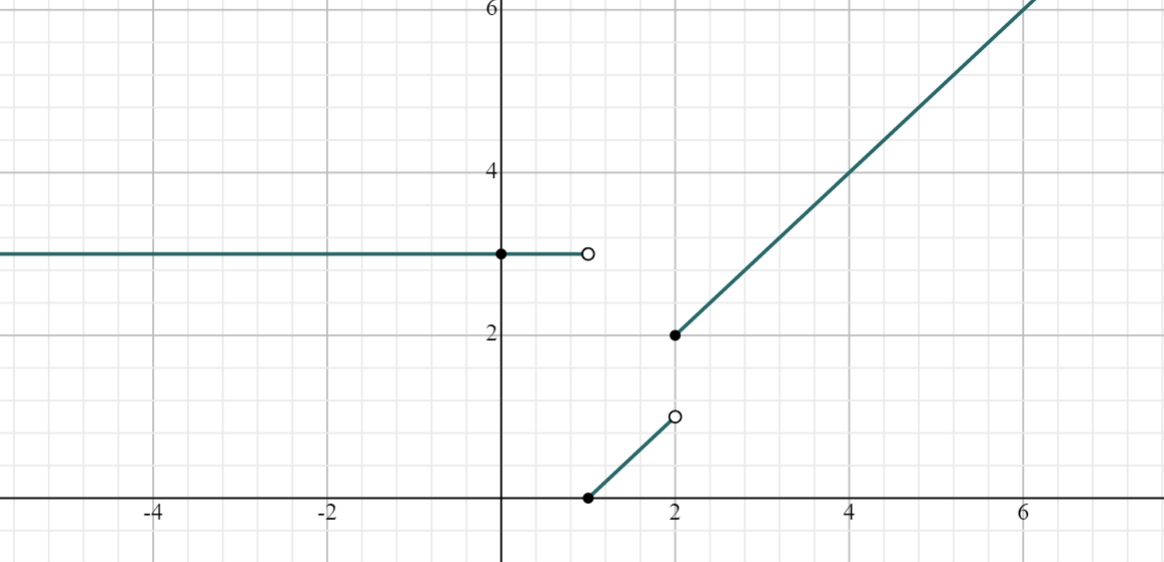

Por lo tanto, considerando lo anterior, podemos guiarnos del gráfico para transformar la función en terminos de la función de Heaviside.
Tenenemos las siguientes funciones basandonos en el gráfico anterior y en las traslaciones posibles:
$$ \theta(t-1) = \left\lbrace                
\begin{matrix}
0 & si & t<1 \\
1 & si & 1\leq t<2
\end{matrix}
\right.
$$

$$ \theta(t-2) = \left\lbrace
\begin{matrix}
0 & si & 1\leq t<2 \\
1 & si & t\geq 1
\end{matrix}
\right.
$$

A traves de lo anterior, junto con el gráfico y basandono en la métodologia utilizada en clases, podemos comenzar a transformar la función en terminos de la función de Heaviside. 
Tendriamos que inicialmente, la función seria:
$$f(t) = 3+[(t-1)-3] \theta(t-1)+[t-(t-1)] \theta(t-2) $$
Reescribiendo lo anterior:
$$3 - 3\theta(t-1) + (t-1)\theta(t-1) - (t-1)\theta(t-2) + t\theta(t-2)$$

Para comprobar que esto esté correcto, podemos gráficar la función. Para ello, vamos a utilizar sympy

In [1]:
# Importamos sympy y Matplotlib.pyplot
import sympy as sp
import matplotlib.pyplot as plt


In [2]:
# Definimos los simbolos que seran utiles para todo el problema
s = sp.Symbol('s')
t = sp.Symbol('t')


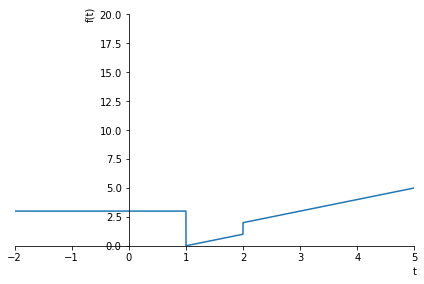

In [3]:
# Definimos f, que es la funcion encontrada, donde sp.Heaviside es 𝜃
f = 3-3*sp.Heaviside(t-1)+(t-1)*sp.Heaviside(t-1)-(t-1)*sp.Heaviside(t-2)+t*sp.Heaviside(t-2)
# Graficaremos x entre -2 y 5 e y entre 0 y 20.
sp.plot(f,xlim=(-2,5),ylim=(0,20), xlabel = 't', ylabel = 'f(t)')


#### Podemos notar que coincide bastante con el gráfico mostrado anteriormente, por lo que se ha logrado exitosamente transforma la función por partes a una función en terminos de la función Heaviside.

### Parte B: Utilizando Transformada de Laplace y con ayuda de los comandos de Python, resuelva laecuación:
### $$y''' + 2y'' = 1 + f(t)$$
### con condiciones y(0) = y'(0) = 0, y''(0) = 1, donde f(t) es la función por partes definida en el apartado anterior.

Primero, podemos utilizar la siguiente formula para obtener las Transformadas de Laplace del lado izquierdo de la ecuación
$$\mathcal{L}\lbrace f^{(n)}(t) \rbrace =s^n\mathcal{L}\lbrace f(t) \rbrace - \displaystyle\sum_{i=1}^n s^{n-i} f^{i-1}(0) = s^n \mathcal{L}\lbrace f(t) \rbrace - s^{(n-1)}f(0)-...-f^{(n-1)}(0)$$
Al aplicar esto, tenemos:
$$\mathcal{L}\lbrace y''' \rbrace = s^3 \mathcal{L}\lbrace y \rbrace(s) - s^2y(0) - sy'(0) - y''(0)$$
$$\mathcal{L}\lbrace y'' \rbrace = s^2 \mathcal{L}\lbrace y \rbrace(s) - sy(0) - y'(0)$$
Reemplazando las condiciones iniciales:
$$\mathcal{L}\lbrace y''' \rbrace = s^3 \mathcal{L}\lbrace y \rbrace(s) - 1$$
$$\mathcal{L}\lbrace y'' \rbrace = s^2 \mathcal{L}\lbrace y \rbrace(s)$$

Y con esto, podemos comenzar a resolver la ecuación utilizando Python y Transformada de Laplace.

In [4]:
# Calculamos la transformada de Laplace de 1
transformada_1 = sp.laplace_transform(1,t,s,noconds = True)
# Calculamos la transformada de Laplace de la funcion obtenida en la parte A
transformada_f = sp.laplace_transform(f,t,s,noconds = True)
# Sumamos ambas transformadas de Laplace, lo que corresponde al lado derecho de la ecuación
lado_derecho = transformada_1 + transformada_f
# Pasamos el 1 de la transformada de Laplace de y''' sumando hacia el lado derecho
lado_derecho = lado_derecho + 1
# Pasamos dividiendo lo que queda tras factoriazar la transformada de Laplace de Y
lado_derecho = lado_derecho / (s**3+2*s**2)
# Ahora, para obtener la solucion de la ecuacion aplicamos transformada inversa de Laplace
transformada_final = sp.inverse_laplace_transform(lado_derecho,s,t,noconds = True)
# Mostramos el resultado final por pantalla
transformada_final


(12*((4*t**2 - 2*t + 1)*exp(2*t) - 1)*Heaviside(t) + (6*(2*t**2 - 10*t - exp(4 - 2*t) + 13)*Heaviside(t - 2) + (4*t**3 - 54*t**2 + 138*t + 21*exp(2 - 2*t) - 109)*Heaviside(t - 1))*exp(2*t))*exp(-2*t)/48

### Parte C
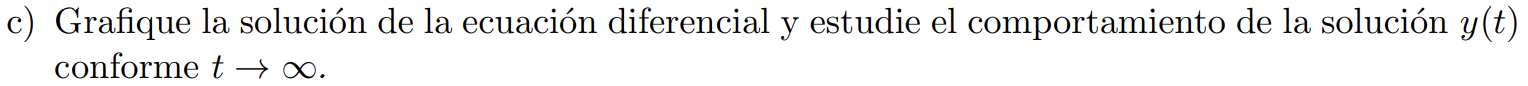

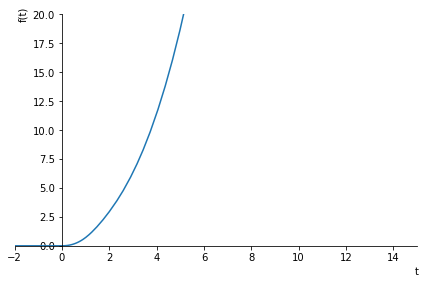

In [5]:
sp.plot(transformada_final, xlim=(-2,15),ylim=(0,20))

#### De este gráfico es posible notar dos cosas, a medida que t → ∞.
* El gráfico llega solo hasta t = 10 y luego se corta. Esto es debido a que en el proceso de la creación de la solución esta involucrada una función por partes
* Su comportamiento parece ser el de una función exponencial, lo cual tiene sentido considerando que hay varias exponenciales involucradas en la función.